# Model Comparison and Feature Selection

This notebook provides supervised learning tools to understand associations between the target variable and the predictors. The supporting Python code is in ModelTools.py. Many of the functions have additional arguments that are defaulted. For more details look through the code. Also add any functions you find useful.

# Outline 

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Part One - Univariate Analysis](#part-one---univariate-analysis)
    - [Load Data and Specify Variables](#load-data-and-specify-variables)
    - [One Hot Encode Categorical Variables](#one-hot-encode-categorical-variables)
    - [Linear Univariate Analysis](#linear-univariate-analysis)
    - [Random Forest Univariate Analysis](#random-forest-univariate-analysis)
    - [Gradient Boosting Univariate Analysis](#gradient-boosting-univariate-analysis)
- [Part Two - Model Comparison](#part-two---model-comparison)
- [Part Three - Variable Selection](#part-three---variable-selection)
    - [Random Forest](#random-forest)
    - [Gradient Boosting](#gradient-boosting)

<!-- MarkdownTOC -->

<a name="part-one---univariate-analysis"></a>
# Part One - Univariate Analysis

<a name="load-data-and-specify-variables"></a>
## Load Data and Specify Variables

In this section we will load our dataset, print the index of each feature and then specify which variables are predictors, target, controls (optional), and weight (optional). For variables with null values, null_value_cleanup will create IS_NULL indicator variables. If you prefer another method of dealing with missing values, like imputing values (e.g. mean, median, mode), write a function to do it, put it in EDATools, and call it below. 

In [1]:
import EDATools
import ModelTools
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm

dataset = sm.datasets.get_rdataset("Schooling", "Ecdat").data

EDATools.null_value_cleanup(dataset)

# Print the index of each feature.
for i, col in enumerate(dataset.columns):
    print(i, col)

/home/homer/anaconda4/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0 smsa66
1 smsa76
2 nearc2
3 nearc4
4 nearc4a
5 nearc4b
6 ed76
7 ed66
8 age76
9 daded
10 nodaded
11 momed
12 nomomed
13 momdad14
14 sinmom14
15 step14
16 south66
17 south76
18 lwage76
19 famed
20 black
21 wage76
22 enroll76
23 kww
24 kww_ISNULL
25 iqscore
26 iqscore_ISNULL
27 mar76
28 libcrd14
29 exp76


Set index of predictors, target, controls, weight.

In [2]:
predictors = np.array([2,3,6,7,8,9,10,11,12,14,15,20,23,25,27,28,29])
numeric_cat_index = np.array([2,3,10,12,14,15,20,27,28])
target = 21

<a name="one-hot-encode-categorical-variables"></a>
## One Hot Encode Categorical Variables

For the purpose of modeling we will one-hot encode each categorical variable. We will also re-name our features so that categorical variables follow the convention VariableName-LevelName. This will allow us to keep track of variable level characteristics, in particular variable importance.

In [3]:
dataset_enc = ModelTools.CreateDummyVars(dataset,predictors,target,numeric_cat_index)

In [4]:
for i, col in enumerate(dataset_enc.columns):
    print(i, col)

0 nearc2-no
1 nearc2-yes
2 nearc4-no
3 nearc4-yes
4 nodaded-no
5 nodaded-yes
6 nomomed-no
7 nomomed-yes
8 sinmom14-no
9 sinmom14-yes
10 step14-no
11 step14-yes
12 black-no
13 black-yes
14 mar76-2
15 mar76-3
16 mar76-4
17 mar76-5
18 mar76-6
19 mar76-Null_Value
20 mar76-yes
21 libcrd14-Null_Value
22 libcrd14-no
23 libcrd14-yes
24 ed76
25 ed66
26 age76
27 daded
28 momed
29 kww
30 iqscore
31 exp76
32 wage76


Split the data into a training and validation set, with the validation set containing p_val_size (defaulted to 0.2) portion of the data.

In [5]:
warnings.filterwarnings('ignore')

predictors_enc = np.arange(32)
target_enc = 32
 
X_train, X_val, Y_train, Y_val = ModelTools.TrainHoldSplit(dataset_enc,predictors_enc,target_enc,p_val_size=0.25)

<a name="linear-univariate-analysis"></a>
## Linear Univariate Analysis

A univariate linear analysis gives us a basic intuition of the relationship between our predictors and our target variable. However it does not account for any correlations that exist, therefore it is not recommended for variable selection. For each predictor we will fit a linear model on the training set and compute the performance on the validation set. For binary classification problems, set p_model = 'binary' for logistic regression; for continuous regression problems, set p_model = 'continuous' and choose the appropriate distribution and link function (defaulted to gamma and log link).
<br>
A list of the top p_top_k_features (defaulted to 5) features will be shown, ordered by their performance on the validation set, and below a graph of the univariate fit will be given along with additional statistics. For each categorical predictor, the fitted value and 95% confidence interval are graphed on the primary axis. On the secondary axis, the weight/count in each level is given as a bar chart. For continuous predictors, the fitted value is graphed with either a scatter plot of the data or p_n_buckets (defaulted to 20) average values, for continuous and classification target variables respectively.

    Variable  Validation Error
3       ed66        172.065387
12       kww        179.337721
4      age76        183.759847
13   iqscore        186.669596
2       ed76        186.843965
15  libcrd14        188.396070
14     mar76        189.992445
11     black        190.615641
7      momed        191.074324
1     nearc4        192.423169
5      daded        193.009638
0     nearc2        193.105693
16     exp76        194.107631
10    step14        194.630936
6    nodaded        195.185459
8    nomomed        195.185459
9   sinmom14        195.920990
Feature: ed66
Validation Error: 172.06538743888194
Training AIC: 30492.6992212


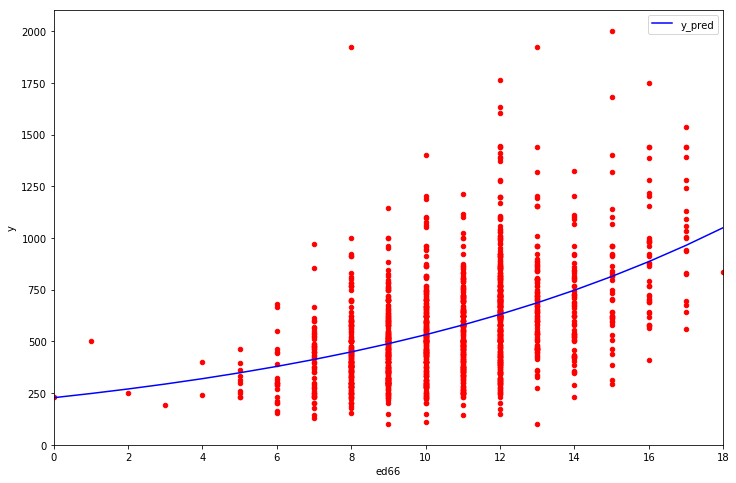

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.156933424742
Method:                          IRLS   Log-Likelihood:                -15244.
Date:                Sun, 14 Jan 2018   Deviance:                       342.23
Time:                        04:15:54   Pearson chi2:                     354.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4273      0.038    141.249      0.000       5.352       5.503
ed66           0.0850      0.003     24.357      0.0

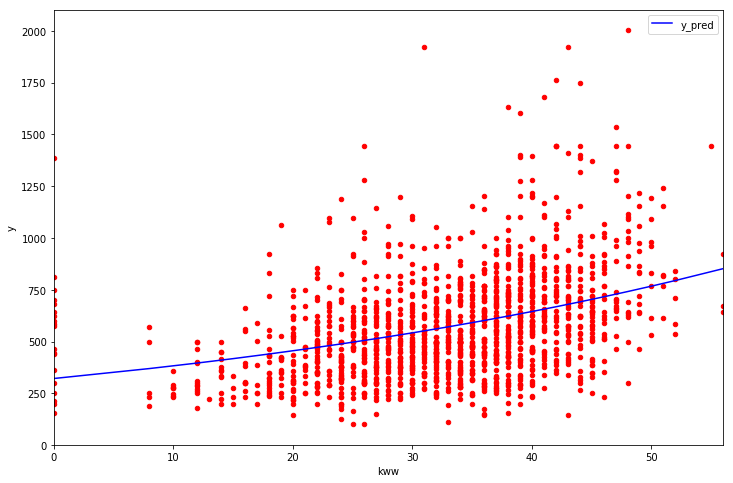

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.178582217264
Method:                          IRLS   Log-Likelihood:                -15338.
Date:                Sun, 14 Jan 2018   Deviance:                       369.44
Time:                        04:15:54   Pearson chi2:                     403.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7732      0.032    181.249      0.000       5.711       5.836
kww            0.0174      0.001     18.760      0.0

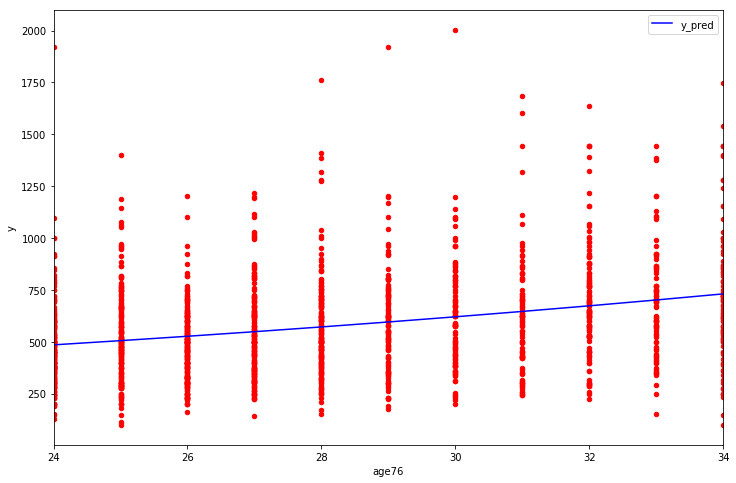

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.180320204338
Method:                          IRLS   Log-Likelihood:                -15423.
Date:                Sun, 14 Jan 2018   Deviance:                       399.39
Time:                        04:15:55   Pearson chi2:                     407.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2009      0.081     64.268      0.000       5.042       5.360
age76          0.0410      0.003     14.332      0.0

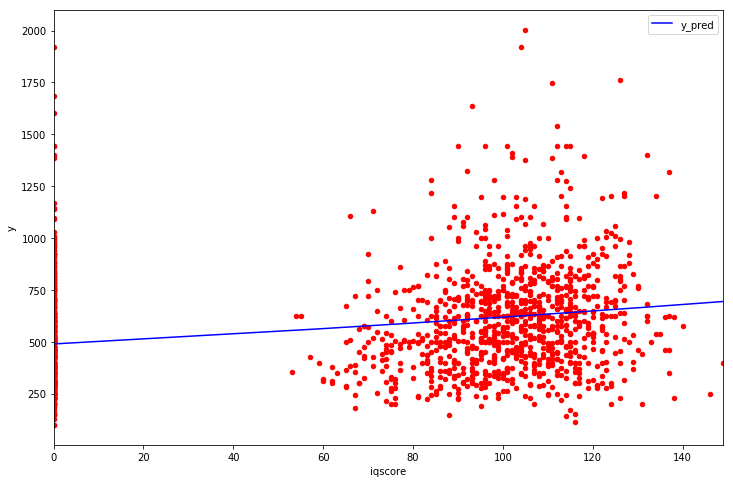

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                   0.19447392104
Method:                          IRLS   Log-Likelihood:                -15448.
Date:                Sun, 14 Jan 2018   Deviance:                       406.24
Time:                        04:15:55   Pearson chi2:                     439.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1936      0.016    389.584      0.000       6.162       6.225
iqscore        0.0023      0.000     12.515      0.0

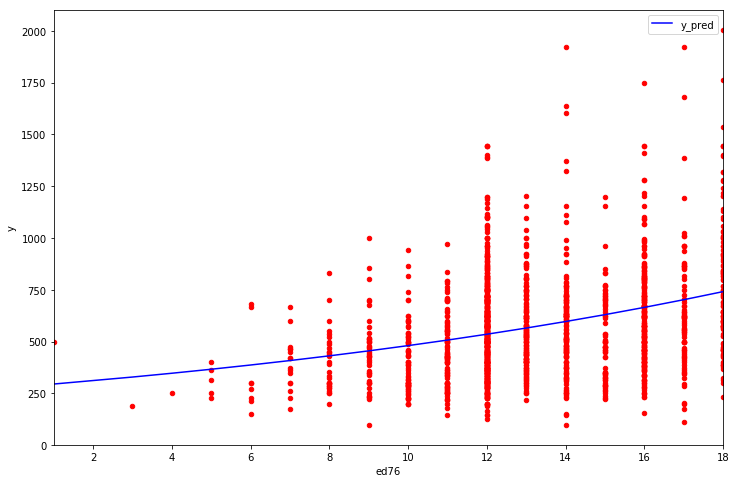

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.179848105677
Method:                          IRLS   Log-Likelihood:                -15397.
Date:                Sun, 14 Jan 2018   Deviance:                       390.16
Time:                        04:15:55   Pearson chi2:                     406.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6337      0.045    125.424      0.000       5.546       5.722
ed76           0.0542      0.003     16.305      0.0

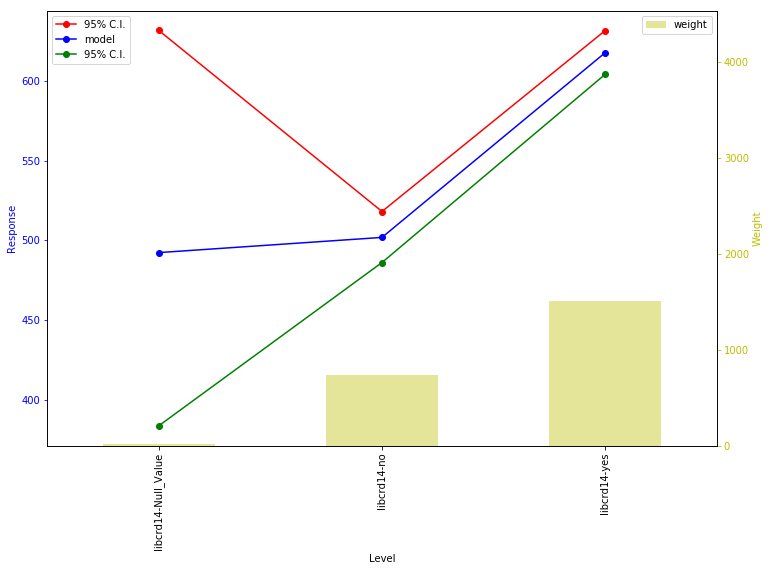

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2254
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                  0.193716163849
Method:                          IRLS   Log-Likelihood:                -15471.
Date:                Sun, 14 Jan 2018   Deviance:                       415.55
Time:                        04:15:56   Pearson chi2:                     437.
No. Iterations:                     5                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
libcrd14-Null_Value     6.1992      0.127     48.791      0.000       5.950       6.448
libcrd14-no             6

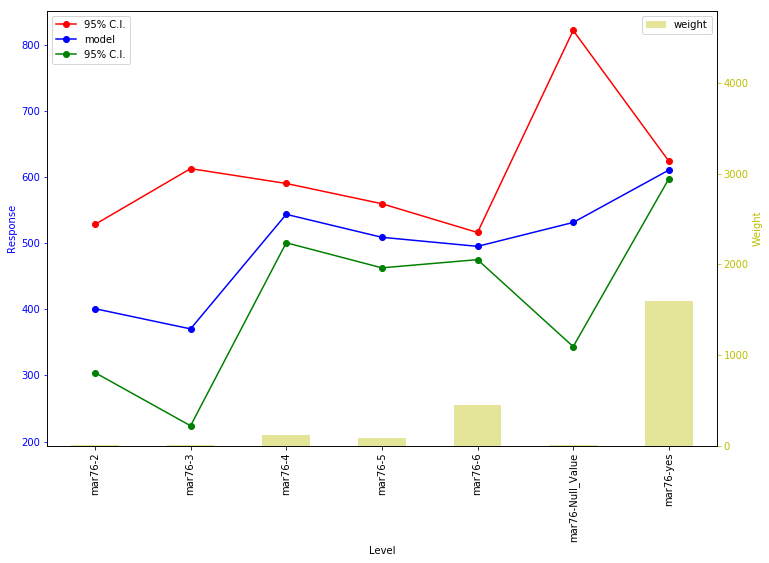

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2250
Model Family:                   Gamma   Df Model:                            6
Link Function:                    log   Scale:                  0.197865162825
Method:                          IRLS   Log-Likelihood:                -15480.
Date:                Sun, 14 Jan 2018   Deviance:                       418.22
Time:                        04:15:56   Pearson chi2:                     445.
No. Iterations:                     5                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
mar76-2              5.9937      0.141     42.610      0.000       5.718       6.269
mar76-3              5.9144      0

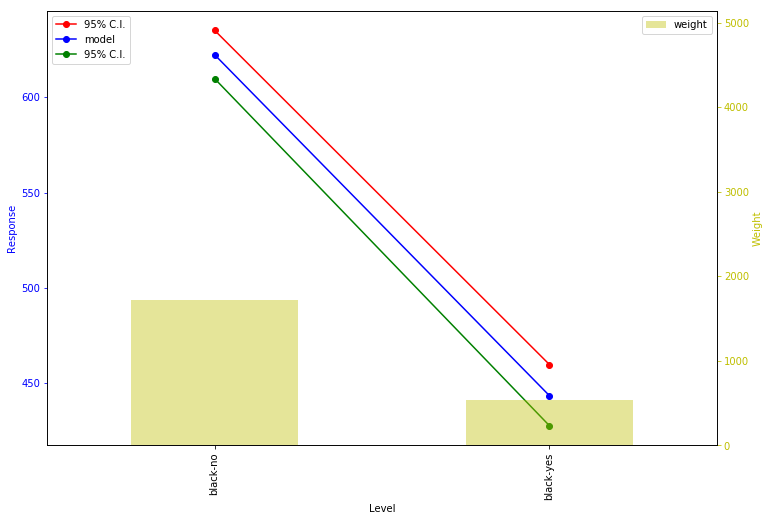

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.184924762152
Method:                          IRLS   Log-Likelihood:                -15404.
Date:                Sun, 14 Jan 2018   Deviance:                       392.05
Time:                        04:15:57   Pearson chi2:                     417.
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
black-no       6.4335      0.010    619.376      0.000       6.413       6.454
black-yes      6.0946      0.018    330.253      0.0

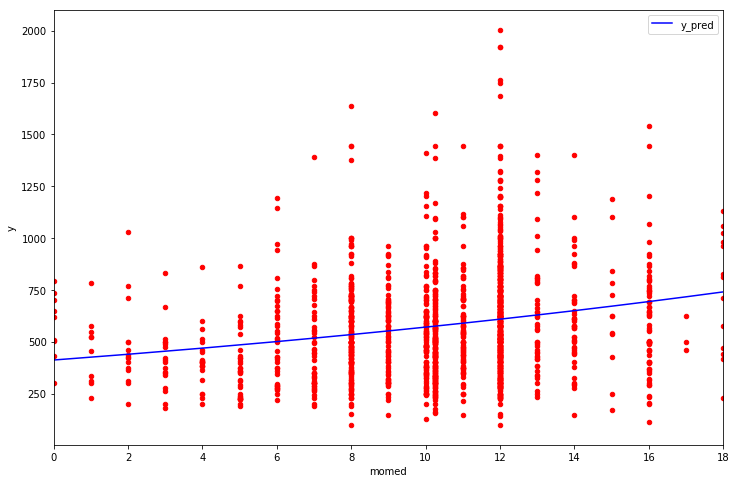

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.193422749363
Method:                          IRLS   Log-Likelihood:                -15472.
Date:                Sun, 14 Jan 2018   Deviance:                       415.97
Time:                        04:15:57   Pearson chi2:                     436.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0203      0.034    179.186      0.000       5.954       6.086
momed          0.0326      0.003     10.434      0.0

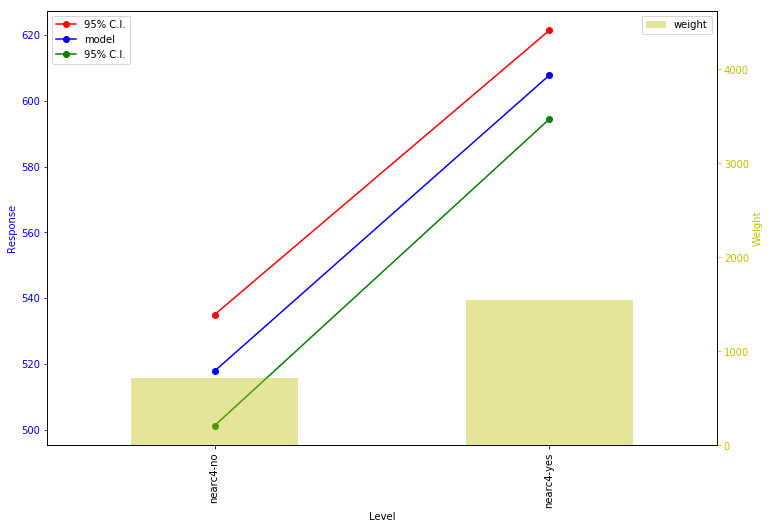

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.197329230325
Method:                          IRLS   Log-Likelihood:                -15495.
Date:                Sun, 14 Jan 2018   Deviance:                       424.35
Time:                        04:15:58   Pearson chi2:                     445.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nearc4-no      6.2498      0.017    376.203      0.000       6.217       6.282
nearc4-yes     6.4098      0.011    566.619      0.0

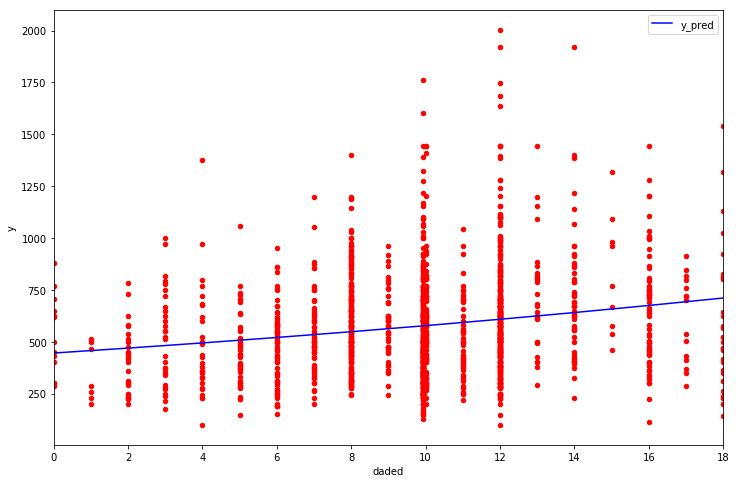

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.192984761143
Method:                          IRLS   Log-Likelihood:                -15483.
Date:                Sun, 14 Jan 2018   Deviance:                       420.33
Time:                        04:15:58   Pearson chi2:                     435.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0994      0.029    207.847      0.000       6.042       6.157
daded          0.0260      0.003      9.295      0.0

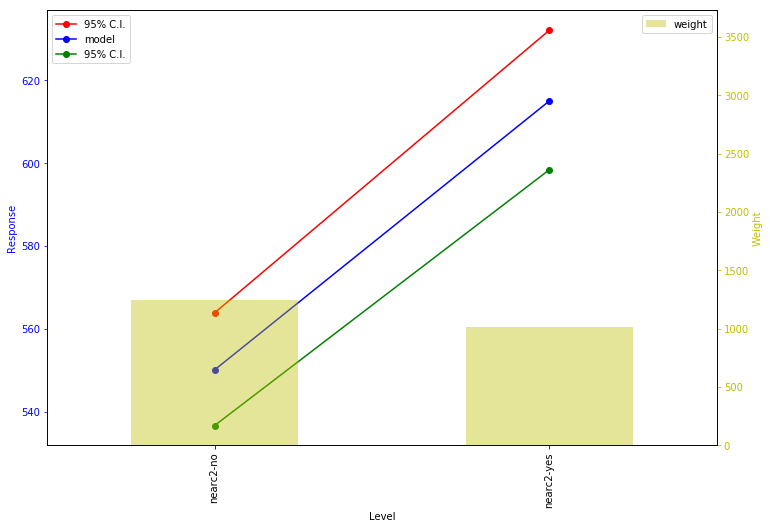

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.197729450082
Method:                          IRLS   Log-Likelihood:                -15509.
Date:                Sun, 14 Jan 2018   Deviance:                       429.64
Time:                        04:15:59   Pearson chi2:                     446.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nearc2-no      6.3102      0.013    500.312      0.000       6.285       6.335
nearc2-yes     6.4217      0.014    459.869      0.0

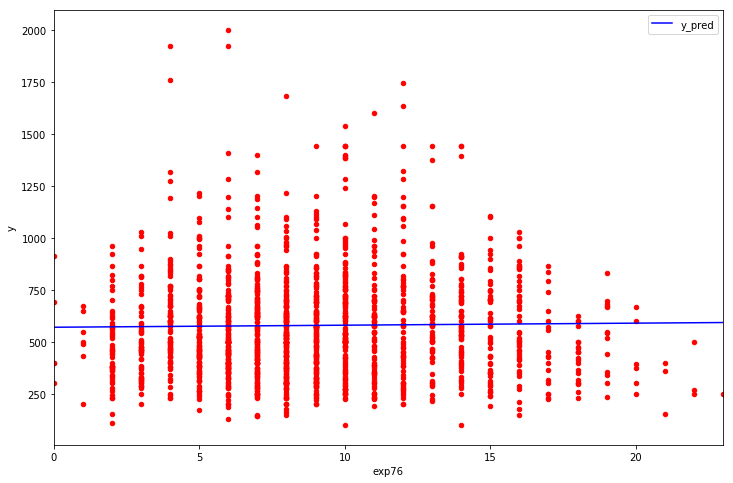

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                   0.20353211957
Method:                          IRLS   Log-Likelihood:                -15528.
Date:                Sun, 14 Jan 2018   Deviance:                       436.51
Time:                        04:15:59   Pearson chi2:                     459.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3468      0.022    282.204      0.000       6.303       6.391
exp76          0.0017      0.002      0.738      0.4

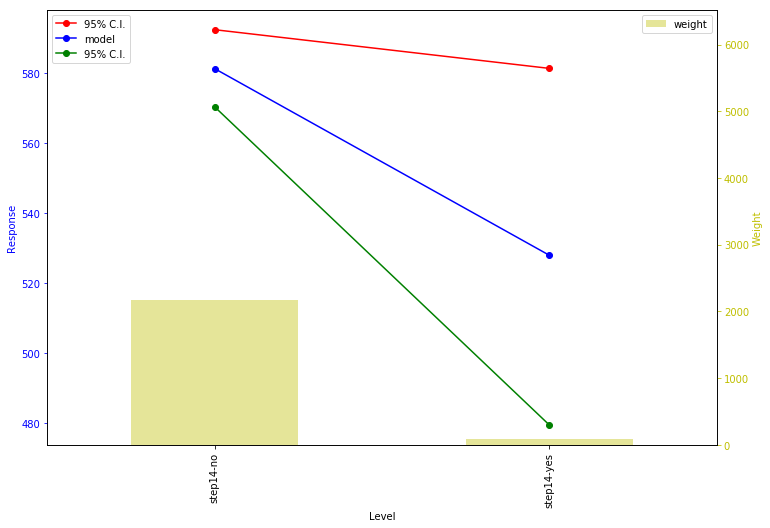

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                   0.20316973807
Method:                          IRLS   Log-Likelihood:                -15527.
Date:                Sun, 14 Jan 2018   Deviance:                       435.88
Time:                        04:16:00   Pearson chi2:                     458.
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
step14-no      6.3653      0.010    658.288      0.000       6.346       6.384
step14-yes     6.2690      0.049    127.469      0.0

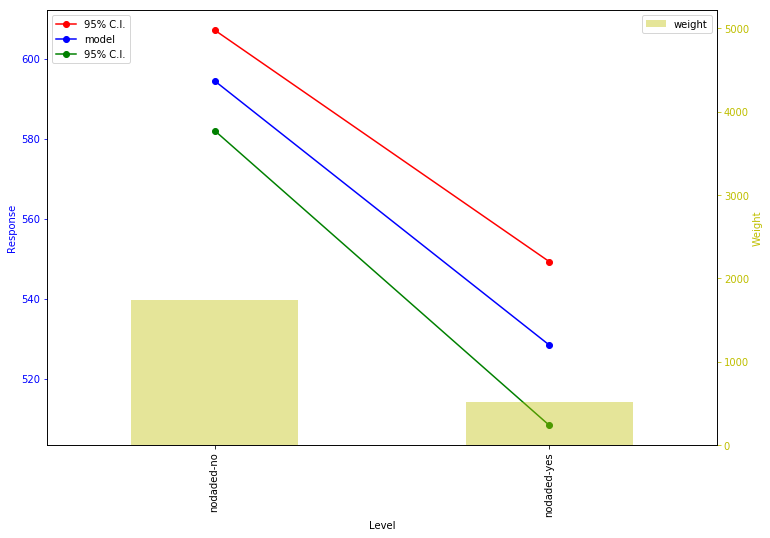

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.201797210324
Method:                          IRLS   Log-Likelihood:                -15515.
Date:                Sun, 14 Jan 2018   Deviance:                       431.19
Time:                        04:16:00   Pearson chi2:                     455.
No. Iterations:                     5                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
nodaded-no      6.3877      0.011    592.971      0.000       6.367       6.409
nodaded-yes     6.2699      0.020    317.665     

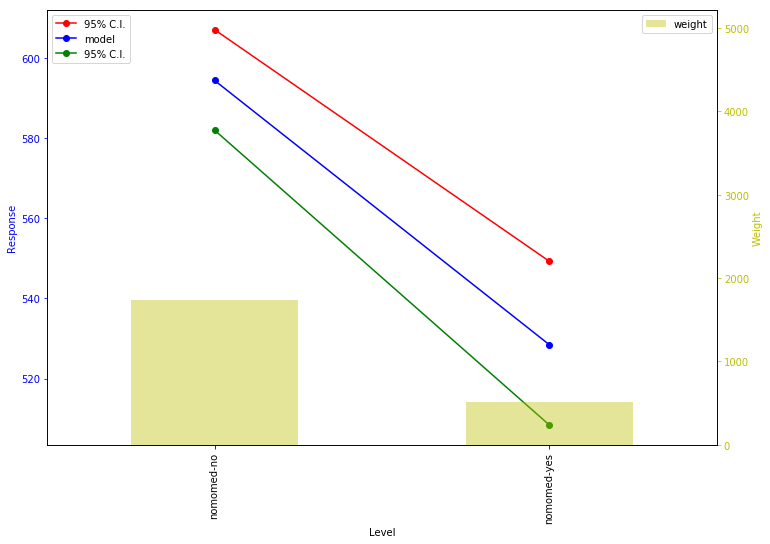

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.201797210324
Method:                          IRLS   Log-Likelihood:                -15515.
Date:                Sun, 14 Jan 2018   Deviance:                       431.19
Time:                        04:16:01   Pearson chi2:                     455.
No. Iterations:                     5                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
nomomed-no      6.3877      0.011    592.971      0.000       6.367       6.409
nomomed-yes     6.2699      0.020    317.665     

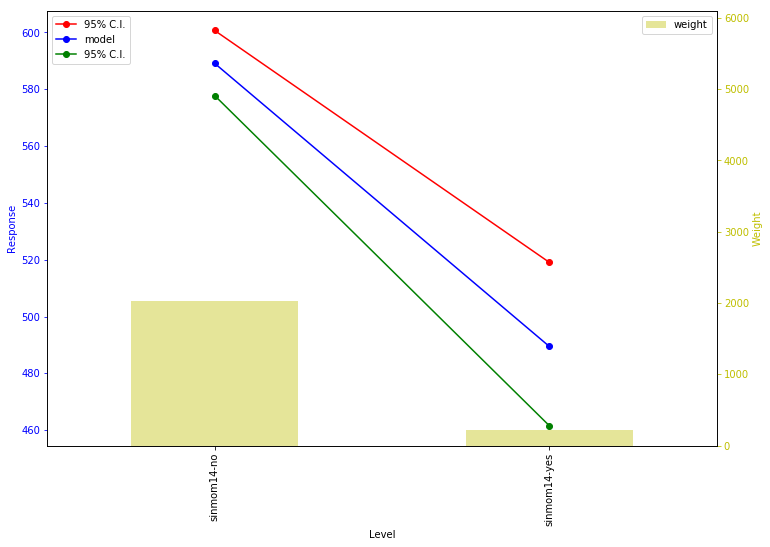

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 wage76   No. Observations:                 2257
Model:                            GLM   Df Residuals:                     2255
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.200111100271
Method:                          IRLS   Log-Likelihood:                -15511.
Date:                Sun, 14 Jan 2018   Deviance:                       430.04
Time:                        04:16:01   Pearson chi2:                     451.
No. Iterations:                     5                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sinmom14-no      6.3787      0.010    643.089      0.000       6.359       6.398
sinmom14-yes     6.1933      0.030    206.747 

In [6]:
warnings.filterwarnings('ignore')

features = ModelTools.FeatureIndexes(dataset, dataset_enc, target_enc)
ModelTools.UnivariateAnalysis(features, X_train, Y_train, X_val, Y_val, p_top_k_features=30, p_model='continuous', p_metric = 'L1 Error', p_n_buckets = 10)

<a name="random-forest-univariate-analysis"></a>
## Random Forest Univariate Analysis

The idea here is to start with all the predictors and iteratively remove one variable at a time, and calculate the loss in overall fit. A larger loss in fit implies a higher marginal importance of the variable. This gives a slightly different perspective than the linear univariate analysis above. Given a group of correlated and highly predictive variables, they will all come through as predictive in the section above since one variable is being fitted at a time, whereas here removing one of these variables should not affect the overall fit too much since the other correlated variables should pick up the lost signal. Here the focus is more on unique contribution of each variable. 
<br>
To avoid over-fitting, p_cross_validations (defaulted to 5) will be used for cross-validation using p_validation_fraction (defaulted to 0.25) for the test set size. In order to reduce run-time, instead of actually removing variables and re-fitting, we will fit the model on the training set and then randomize the variable we would like to remove in order to break any relationship between it and the target variable. This allows us to fit the model once (for each cross-validation set) and infer for each of our predictors instead of re-fitting it for each of our predictors. 

In [7]:
ModelTools.UnivariateRandomForestPermutations(p_features = features,
                                              p_X_train = X_train,
                                              p_Y_train = Y_train,
                                              p_regression = True,
                                              p_metric = 'L1 Error')

*********Features sorted by their L1 error based score:**********
ed66: 0.09331
kww: 0.03174
mar76: 0.03049
black: 0.02612
iqscore: 0.01461
daded: 0.01167
ed76: 0.01133
momed: 0.00823
libcrd14: 0.00599
nearc2: 0.00505
exp76: 0.00502
sinmom14: 0.00148
age76: 0.00110
nomomed: 0.00078
nearc4: 0.00048
nodaded: -0.00020
step14: -0.00178


<a name="gradient-boosting-univariate-analysis"></a>
## Gradient Boosting Univariate Analysis

This section is analagous to the Random Forest Univariate Analysis section above, except using Gradient Boosting models instead of Random Forest models. 

In [8]:
ModelTools.UnivariateGradientBoostingPermutations(p_features = features,
                                                  p_X_train = X_train,
                                                  p_Y_train = Y_train,
                                                  p_regression = True,
                                                  p_metric = 'L1 Error')

*********Features sorted by their L1 error based score:**********
ed66: 0.03900
kww: 0.03655
black: 0.03389
iqscore: 0.02206
mar76: 0.01482
exp76: 0.00900
momed: 0.00636
nearc2: 0.00630
age76: 0.00565
ed76: 0.00466
daded: 0.00267
nearc4: 0.00160
libcrd14: 0.00089
nomomed: 0.00047
nodaded: 0.00012
sinmom14: 0.00000
step14: 0.00000


<a name="part-two---model-comparison"></a>
# Part Two - Model Comparison

Early in the modeling process a decision needs to made about which type of model to use. This choice should be driven by the nature of the modeling problem, the nature of the data, and the relationship between the predictors and the target variable. Even after these considerations have been made there are often multiple viable options. This section compares the fit of different models using all of the predictor variables (this can be changed the p_predictors argument). Within the code you can choose the set of hyperparameters you want to test for each model. Soon there will be an additional section here to do a hyperparameter search using some combination of Bayesian Optimization, grid search, and random search.

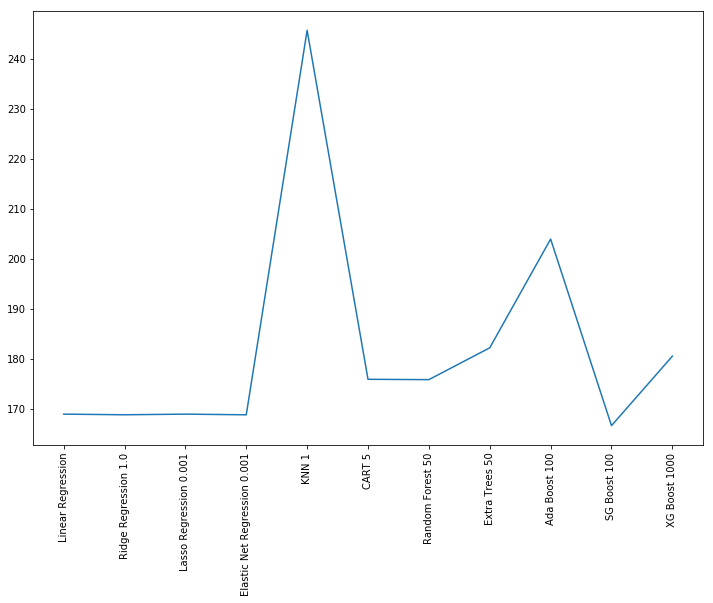

                           Model  Validation Error
9                   SG Boost 100        166.654619
3   Elastic Net Regression 0.001        168.827198
1           Ridge Regression 1.0        168.833047
2         Lasso Regression 0.001        168.959466
0              Linear Regression        168.961526
6               Random Forest 50        175.861780
5                         CART 5        175.932285
10                 XG Boost 1000        180.556024
7                 Extra Trees 50        182.230890
8                  Ada Boost 100        203.988844
4                          KNN 1        245.760956


In [9]:
#warnings.filterwarnings('ignore')

ModelTools.ModelComparisonRegression(p_X_train = X_train,
                                     p_X_val = X_val,
                                     p_Y_train = Y_train,
                                     p_Y_val = Y_val,
                                     p_predictors = predictors_enc,
                                     p_metric = 'L1')   

<a name="part-three---variable-selection"></a>
# Part Three - Variable Selection

Once a model has been chosen, we need to decide which predictor variables to include. Variable selection will be done using backward and forward stepwise selection. The backward part of this algorithm begins by starting with all, say $n$, predictor variables and iteratively removing one variable at a time and measuring the change in performance. The worst performing variable is then removed from the model. We repeat the process with the $n-1$ remaining variables, again removing the worst performing variable. This continues until all of the remaining variables make a "significant" contribution to the model fit. The specific stopping criteria will depend on the problem and metric that is chosen. The forward stepwise selection will then be run (if p_forward = True), by iteratively adding each of the variables that were removed in the backward selection. The most significant, if there any, will be added back to the model. This process continues until none of the remaining variables significantly improve the model.
<br>
It may not be immediately clear why the forward iteration is useful. The backward (and forward) stepwise selection is a greedy algorithm and may find a local optimum in the feature space. Running the forward iteration will increase the chance of finding the global optimum, however does not guarantee it. Ideally we would compare the model fit on every subset of our preditor variables, however this is computationally expensive with $O(2^n)$ run-time, compared to $O(n^2)$ run-time with the backward/forward selection.

<a name="random-forest"></a>
## Random Forest

Here we run backward and forward stepwise selection with Random Forest models. Similar to the univariate random forest section we will cross-validate using p_cross_validations splits and p_validation_fraction portion of the data in each test set. And again to reduce run-time, instead of removing variables and re-fitting, we will randomize the variable we would like to remove which should have the same effect. 

In [10]:
ModelTools.ForBackRandomForestPremutations(p_features = features,
                                           p_predictors = predictors_enc,
                                           p_X_train = X_train,
                                           p_Y_train = Y_train,
                                           p_X_val = X_val,
                                           p_Y_val = Y_val,
                                           p_regression = True,
                                           p_metric = 'L1 Error')

*******Variable Performance From Final Backward Iteration:*******
ed66: 0.09269
kww: 0.03156
mar76: 0.03135
black: 0.02698
iqscore: 0.01285
ed76: 0.01154
daded: 0.01123
momed: 0.00730
libcrd14: 0.00604
nearc2: 0.00601
exp76: 0.00374
sinmom14: 0.00163
nearc4: 0.00091
age76: 0.00065
nodaded: 0.00042
nomomed: -0.00006
****************The optimal set of variables is:*****************
nearc2
nearc4
ed76
ed66
age76
daded
nodaded
momed
sinmom14
black
kww
iqscore
mar76
libcrd14
exp76
nomomed
The optimal model has an L1 error of 175.54440 on the validation set


<a name="gradient-boosting"></a>
## Gradient Boosting

This section is analagous to the one above, except using gradient boosting.

In [11]:
ModelTools.ForBackGradientBoostingPremutations(p_features = features,
                                               p_predictors = predictors_enc,
                                               p_X_train = X_train,
                                               p_Y_train = Y_train,
                                               p_X_val = X_val,
                                               p_Y_val = Y_val,
                                               p_regression = True,
                                               p_metric = 'L1 Error',
                                               p_threshold = 0.1)

*******Variable Performance From Final Backward Iteration:*******
ed66: 0.16895
black: 0.06820
****************The optimal set of variables is:*****************
ed66
The optimal model has an L1 error of 180.08853 on the validation set
